# Harris corner detector

<p>This notebook computes the corners using the Harris corner detection algorithm

In [1]:
from scipy.ndimage import filters
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

First, we compute the Harris corner detector response function for each pixel in a graylevel image

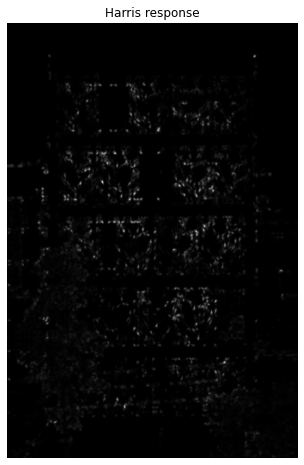

In [2]:
im = np.array(Image.open('images/facade.jpg').convert('L'))
sigma = 3.0
# derivatives
imx = np.zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
imy = np.zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
# compute components of the Harris matrix
Wxx = filters.gaussian_filter(imx*imx,sigma)
Wxy = filters.gaussian_filter(imx*imy,sigma)
Wyy = filters.gaussian_filter(imy*imy,sigma)
# determinant and trace
Wdet = Wxx*Wyy - Wxy**2
Wtr = Wxx + Wyy
response = Wdet / Wtr
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))
axis.imshow(response, cmap = 'gray'); axis.set_title('Harris response')
plt.axis('off')
plt.show()

Then we show the Harris response and corners found at different minimum distances and thresholds

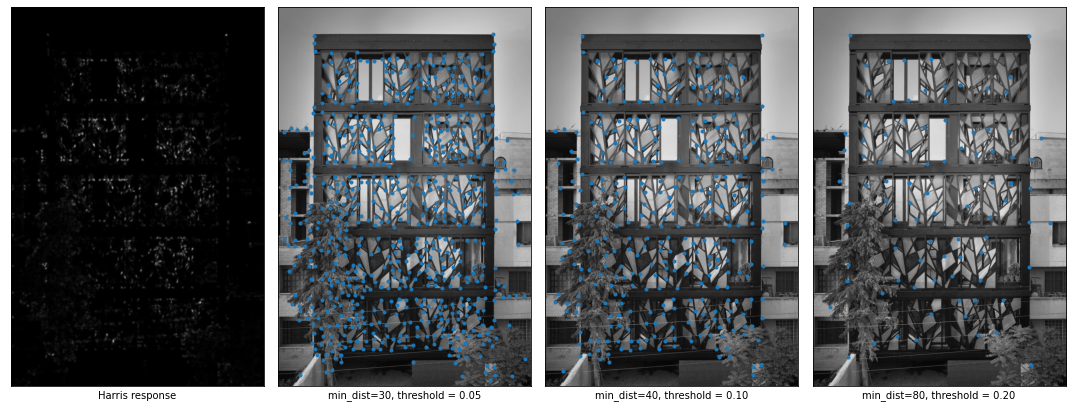

In [3]:
def get_harris_points(harrisim, min_dist=10, threshold=0.1):
    """ Return corners from a Harris response image
        min_dist is the minimum number of pixels separating corners and image boundary """
    # find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold 
    harrisim_t = (harrisim > corner_threshold) * 1
    # get coordinates of candidates
    coords = np.array(harrisim_t.nonzero()).T
    # ...and their values
    candidate_values = [harrisim[c[0],c[1]] for c in coords]
    # sort candidates
    index = np.argsort(candidate_values)
    # store allowed point locations in array
    allowed_locations = np.zeros(harrisim.shape) 
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    # select the best points taking min_distance into account
    filtered_coords = [] 
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1: 
            filtered_coords.append(coords[i]) 
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
               (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords

def plot_harris_points(axis, image, filtered_coords, title):
    """ Plots corners found in image """
    axis.imshow(image)
    axis.plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'.')
    axis.set_xlabel(title) 

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 8))
plt.gray()
axes[0].imshow(response); axes[0].set_xlabel('Harris response')
min_dist, threshold = 30, 0.05
filteded_coords = get_harris_points(response, min_dist=min_dist, threshold=threshold)
plot_harris_points(axes[1], im, filteded_coords, 'min_dist=%d, threshold = %.2f' % (min_dist, threshold))
min_dist, threshold = 40, 0.1
filteded_coords = get_harris_points(response, min_dist=min_dist, threshold=threshold)
plot_harris_points(axes[2], im, filteded_coords, 'min_dist=%d, threshold = %.2f' % (min_dist, threshold))
min_dist, threshold = 80, 0.2
filteded_coords = get_harris_points(response, min_dist=min_dist, threshold=threshold)
plot_harris_points(axes[3], im, filteded_coords, 'min_dist=%d, threshold = %.2f' % (min_dist, threshold))
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.tight_layout()